Epoch 1/100
94/94 - 4s - loss: 0.0524 - 4s/epoch - 42ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0269 - 252ms/epoch - 3ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0201 - 253ms/epoch - 3ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0181 - 252ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0172 - 243ms/epoch - 3ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0164 - 241ms/epoch - 3ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0155 - 243ms/epoch - 3ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0146 - 250ms/epoch - 3ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0135 - 251ms/epoch - 3ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0127 - 246ms/epoch - 3ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0119 - 242ms/epoch - 3ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0107 - 250ms/epoch - 3ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0097 - 238ms/epoch - 3ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0087 - 243ms/epoch - 3ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0078 - 239ms/epoch - 3ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0069 - 238ms/epoc

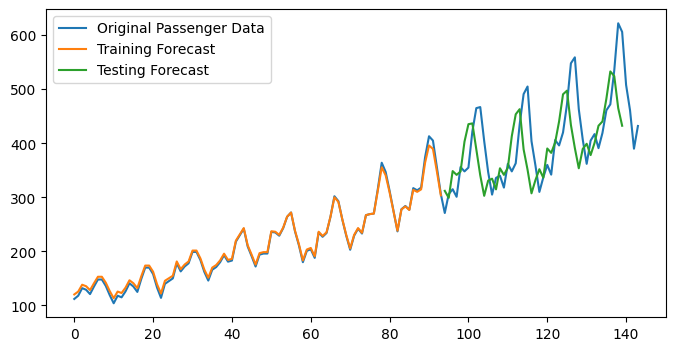

In [ ]:
# Import Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Fetch Passenger Data
passenger_data_url = "https://raw.githubusercontent.com/quratulaincodes/SSR/main/international-airline-passengers.csv"
passenger_dataframe = pd.read_csv(passenger_data_url)

# Convert to Numpy Array and Normalize
passenger_array = passenger_dataframe.iloc[:, 1].values.astype('float32')  # Assuming column 1 contains the passenger data
scaler_toolbox = MinMaxScaler(feature_range=(0, 1))
normalized_passenger_data = scaler_toolbox.fit_transform(passenger_array.reshape(-1, 1))

# Divide into Training and Test Segments
partition_size = int(len(normalized_passenger_data) * 0.67)
remainder_size = len(normalized_passenger_data) - partition_size
train_partition, test_partition = normalized_passenger_data[0:partition_size,:], normalized_passenger_data[partition_size:len(normalized_passenger_data),:]

def organize_data(sequence_data, history_length=1):
    input_data, target_data = [], []
    for idx in range(len(sequence_data)-history_length-1):
        fragment = sequence_data[idx:(idx+history_length), 0]
        input_data.append(fragment)
        target_data.append(sequence_data[idx + history_length, 0])
    return np.array(input_data), np.array(target_data)

history_length = 1
train_input, train_target = organize_data(train_partition, history_length)
test_input, test_target = organize_data(test_partition, history_length)
train_input = np.reshape(train_input, (train_input.shape[0], 1, train_input.shape[1]))
test_input = np.reshape(test_input, (test_input.shape[0], 1, test_input.shape[1]))

# Build and Train LSTM Network
flight_model = Sequential()
flight_model.add(LSTM(4, input_shape=(1, history_length)))
flight_model.add(Dense(1))
flight_model.compile(loss='mean_squared_error', optimizer='adam')
flight_model.fit(train_input, train_target, epochs=100, batch_size=1, verbose=2)

# Make Predictions and Assess Model
train_forecast = flight_model.predict(train_input)
test_forecast = flight_model.predict(test_input)
train_forecast = scaler_toolbox.inverse_transform(train_forecast)
train_target = scaler_toolbox.inverse_transform([train_target])
test_forecast = scaler_toolbox.inverse_transform(test_forecast)
test_target = scaler_toolbox.inverse_transform([test_target])
train_evaluation = np.sqrt(mean_squared_error(train_target[0], train_forecast[:,0]))
print('Training Evaluation: %.2f RMSE' % (train_evaluation))
test_evaluation = np.sqrt(mean_squared_error(test_target[0], test_forecast[:,0]))
print('Testing Evaluation: %.2f RMSE' % (test_evaluation))

# Visualizing Original Data and Forecasts
plt.figure(figsize=(8,4))
plt.plot(scaler_toolbox.inverse_transform(normalized_passenger_data), label='Original Passenger Data')
plt.plot([item for item in train_forecast], label='Training Forecast')
plt.plot([item+len(train_forecast) for item in range(len(test_forecast))], test_forecast, label='Testing Forecast')
plt.legend()
plt.show()
